## Final Notebook begins here

Hello! Our group, Sandy's Hill, decided to take a density based approach to determining what the best neighborhood in pittsburgh. All three metrics involve paying attention to the amount and concentration of a certain resource/ populace in the city, and the more concentrated in the same neighborhood, the better!

## Mobility analysis ( Mae's Section )

I've decided that I'm going to try and look at the data on how many bus stops there are in each neighborhood, and use that metric to determine the best neighborhood in Pittsburgh. The higher the bustop density is, i.e. number of bustops over total neighborhood area, is the best one.

In [1]:
# First we need to import our data set
import geopandas as gpd # geopands because its a .dbf
import pandas as pd
import numpy as np

dbf = r'PAAC_Stops_1909.dbf'

table = gpd.read_file(dbf)

pdtable = pd.DataFrame(table)
pdtable.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,None
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,None
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,None
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,None
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,None


Great! We have some sample data to look at. The issue we have now is that this doesn't include the neighbourhood that it's in. Bummer. We need to convert the coordinates of the bustop that it gives us into the Pittsburgh neighbourhood that it's in. For that we'll use geopy. I'm going to use the first stop for this example, 26th St at Penn Ave FS, in order to facillitate this.

Now, I wasn't actually able to install geopy on JupyterHub, so instead I installed it on my own machine and ran my script there. The raw output from the code was as follows: 
```
{
   "place_id":287122303,
   "licence":"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
   "osm_type":"way",
   "osm_id":11824114,
   "lat":"40.4546",
   "lon":"-79.978302",
   "display_name":"2599, 
Spring Way, Strip District, Pittsburgh, Allegheny County, Pennsylvania, 15222, United States",
   "address":{
      "house_number":"2599",
      "road":"Spring Way",
      "neighbourhood":"Strip District",
      "city":"Pittsburgh",
      "county":"Allegheny County",
      "state":"Pennsylvania",
      "postcode":"15222",
      "country":"United States",
      "country_code":"us"
   },
   "boundingbox":[
      "40.45455",
      "40.45465",
      "-79.978352",
      "-79.978252"
   ]
}
```

There it is! Under address.neighbourhood, it gives the name of the district it's in. And by checking those coordinates on google maps, we can verify that it is indeed the correct neighborhood. Amazing! Now I'm going to pack all of this up into a neat function that turns latitude and longitude coordinates into a Pitt neighbourhood

In [ ]:
def getDistrict(latitude, longitude):
    location = locator.reverse(latitude + ", " + longitude)
    if 'address' in location.raw:
        if 'neighbourhood' in location.raw["address"]:
            return location.raw['address']['neighbourhood']

    return 'N/A' # data is missing so return a placeholder

print(getDistrict("40.454635", "-79.978170")) # prints out 'Strip District'

Perfect! Now all that's left to do is iterate through every bus stop and increment each neighbourhood's counter in a dictionary each time a bus stop lands there.

In [ ]:
stops = {}
count = 0

for index, row in pdtable.iterrows():
    neighbourhood = getDistrict(str(row['Latitude']), str(row['Longitude']))
    if neighbourhood in stops:
        stops[neighbourhood] = stops[neighbourhood] + 1
    else:
        stops[neighbourhood] = 1
    
    count = count + 1
    print(str(count) + "/6946 : " + neighbourhood)

print(stops)

After letting that script run while I took a nap, here's the results I got:
```
{
   "Strip District":38,
   "Polish Hill":35,
   "Central Lawrenceville":10,
   "N/A":3328,
   "Shadyside":82,
   "Point Breeze":26,
   "Bellefield":12,
   "North Oakland":47,
   "Soho":35,
   "West Oakland":29,
   "South Oakland":20,
   "Larimer":63,
   "Point Breeze North":6,
   "Squirrel Hill North":31,
   "Downtown":97,
   "Squirrel Hill":40,
   "Eastwood":44,
   "Schenley Heights":22,
   "Garfield":40,
   "Four Mile Run":27,
   "Morningside":37,
   "Bloomfield":82,
   "Friendship":23,
   "Squirrel Hill South":86,
   "East Liberty":68,
   "Crawford-Roberts":27,
   "Greenfield":51,
   "Terrace Village":15,
   "Blackridge":8,
   "Bedford Dwellings":12,
   "Hazelwood":25,
   "Oakland":12,
   "Oakcliffe":3,
   "Regent Square":27,
   "Highland Park":38,
   "Lower Lawrenceville":34,
   "Lawrenceville":12,
   "Upper Lawrenceville":32,
   "Stanton Heights":29,
   "Upper Hill":1,
   "Hill District":19,
   "Middle Hill":13,
   "Nadine":13,
   "Hamnett Place":95,
   "Swisshelm Park":5,
   "Belmar":63,
   "Brushton":38,
   "East Hills":42,
   "Holiday Park":6,
   "Bluff":7,
   "Park Place":15,
   "Point Breeze South":1,
   "Homewood West":25,
   "Homewood North":24,
   "Homewood South":11,
   "Lincoln Park":16,
   "Frankstown Estates":27,
   "Crescent Hills":16,
   "Laketon Heights":2,
   "Homewood":18,
   "Glen Hazel":17,
   "Glenwood":39,
   "Lincoln-Lemington-Belmar":33,
   "North Bessemer":20,
   "Newfield":2,
   "Crestas Terrace":7,
   "Churchill Valley":1,
   "Universal":14,
   "Alcoma Estates":14,
   "Regency Park":13,
   "Penn Ridge":17,
   "Unity":16,
   "Eastvue":9,
   "Lincoln-Lemington":1,
   "Rosedale":2,
   "Rosedale Heights":9,
   "Shannon Heights":2,
   "Verona Hills":1,
   "Oakmont Commons":2,
   "Sandy Creek":7,
   "West Wilmerding":10,
   "Chateau":20,
   "Manchester":24,
   "Allegheny West":11,
   "California-Kirkbride":31,
   "Allegheny Center":19,
   "Evergreen":11,
   "Brighton Heights":66,
   "Central Northside":24,
   "Marshall-Shadeland":45,
   "Perry Hilltop":36,
   "Spring Hill":16,
   "Fineview":14,
   "East Allegheny":31,
   "Summer Hill":32,
   "Woods Run":15,
   "Perry South":16,
   "North Shore":7,
   "Troy Hill":46,
   "Northview Heights":22,
   "City View":18,
   "Perry North":34,
   "Hites":19,
   "Glassmere":1,
   "Natrona Heights":18,
   "Pleasantville":1,
   "Creighton":1,
   "River Valley":11,
   "Spring Garden":34,
   "Mexican War Streets Historic District":2,
   "Homestead Park":32,
   "Billy Buck Hill":21,
   "South Side Flats":59,
   "Bon Air":13,
   "Knoxville":41,
   "South Side Slopes":30,
   "Allentown":23,
   "Arlington":14,
   "Hays":9,
   "Beltzhoover":41,
   "Carrick":100,
   "Lincoln Place":27,
   "South Shore":15,
   "Overbrook":16,
   "St. Clair":2,
   "Mount Washington":97,
   "New Homestead":1,
   "Mount Oliver":14,
   "Brookline":48,
   "Mission Hills":24,
   "Corliss":35,
   "Windgap":19,
   "Fairywood":16,
   "Elliott":20,
   "Crafton Heights":42,
   "Sheraden":11,
   "Chartiers City":6,
   "Grace Manor":10,
   "Duquesne Heights":15,
   "McKees Rocks Bottoms":19,
   "East Carnegie":13,
   "Westwood":18,
   "Oakwood":16,
   "West End":10,
   "Esplen":9,
   "Banksville":15,
   "Beechview":29,
   "Cedarhurst Manor":20,
   "West Liberty":21,
   "Sunset Hills":4
}
```
Let's store all of the stops in our stops variable, and then we can compare the amount of stops in each district to its total area. Using Neighborhoods_.csv, we can get the number of square miles in the sqmiles column, and the name of the neighborhood in the hood column.

In [2]:
stops = {'Strip District': 38, 'Polish Hill': 35, 'Central Lawrenceville': 10, 'N/A': 3328, 'Shadyside': 82, 'Point Breeze': 26, 'Bellefield': 12, 'North Oakland': 47, 'Soho': 35, 'West Oakland': 29, 'South Oakland': 20, 'Larimer': 63, 'Point Breeze North': 6, 'Squirrel Hill North': 31, 'Downtown': 97, 'Squirrel Hill': 40, 'Eastwood': 44, 'Schenley Heights': 22, 'Garfield': 40, 'Four Mile Run': 27, 'Morningside': 37, 'Bloomfield': 82, 'Friendship': 23, 'Squirrel Hill South': 86, 'East Liberty': 68, 'Crawford-Roberts': 27, 'Greenfield': 51, 'Terrace Village': 15, 'Blackridge': 8, 'Bedford Dwellings': 12, 'Hazelwood': 25, 'Oakland': 12, 'Oakcliffe': 3, 'Regent Square': 27, 'Highland Park': 38, 'Lower Lawrenceville': 34, 'Lawrenceville': 12, 'Upper Lawrenceville': 32, 'Stanton Heights': 29, 'Upper Hill': 1, 'Hill District': 19, 'Middle Hill': 13, 'Nadine': 13, 'Hamnett Place': 95, 'Swisshelm Park': 5, 'Belmar': 63, 'Brushton': 38, 'East Hills': 42, 'Holiday Park': 6, 'Bluff': 7, 'Park Place': 15, 'Point Breeze South': 1, 'Homewood West': 25, 'Homewood North': 24, 'Homewood South': 11, 'Lincoln Park': 16, 'Frankstown Estates': 27, 'Crescent Hills': 16, 'Laketon Heights': 2, 'Homewood': 18, 'Glen Hazel': 17, 'Glenwood': 39, 'Lincoln-Lemington-Belmar': 33, 'North Bessemer': 20, 'Newfield': 2, 'Crestas Terrace': 7, 'Churchill Valley': 1, 'Universal': 14, 'Alcoma Estates': 14, 'Regency Park': 13, 'Penn Ridge': 17, 'Unity': 16, 'Eastvue': 9, 'Lincoln-Lemington': 
1, 'Rosedale': 2, 'Rosedale Heights': 9, 'Shannon Heights': 2, 'Verona Hills': 1, 'Oakmont Commons': 2, 'Sandy Creek': 7, 'West Wilmerding': 10, 'Chateau': 20, 'Manchester': 24, 'Allegheny West': 11, 'California-Kirkbride': 31, 'Allegheny Center': 19, 'Evergreen': 11, 'Brighton Heights': 66, 'Central Northside': 24, 'Marshall-Shadeland': 45, 'Perry Hilltop': 36, 'Spring Hill': 16, 'Fineview': 14, 'East Allegheny': 31, 'Summer Hill': 32, 'Woods Run': 15, 'Perry South': 16, 'North Shore': 7, 'Troy Hill': 46, 'Northview Heights': 22, 'City View': 18, 'Perry North': 34, 'Hites': 19, 'Glassmere': 1, 'Natrona Heights': 18, 'Pleasantville': 1, 'Creighton': 1, 'River Valley': 11, 'Spring Garden': 34, 'Mexican War Streets Historic District': 2, 'Homestead Park': 32, 'Billy Buck Hill': 21, 'South Side Flats': 59, 'Bon Air': 13, 'Knoxville': 41, 'South Side Slopes': 30, 'Allentown': 23, 'Arlington': 14, 'Hays': 9, 'Beltzhoover': 41, 'Carrick': 100, 'Lincoln Place': 27, 'South Shore': 15, 'Overbrook': 16, 'St. Clair': 2, 'Mount Washington': 97, 'New Homestead': 1, 'Mount Oliver': 14, 'Brookline': 48, 'Mission Hills': 24, 'Corliss': 35, 'Windgap': 19, 'Fairywood': 16, 'Elliott': 20, 'Crafton Heights': 42, 'Sheraden': 11, 'Chartiers City': 6, 'Grace Manor': 10, 'Duquesne Heights': 15, 'McKees Rocks Bottoms': 19, 'East Carnegie': 13, 'Westwood': 18, 'Oakwood': 16, 'West End': 10, 'Esplen': 9, 'Banksville': 15, 'Beechview': 29, 'Cedarhurst Manor': 20, 'West Liberty': 21, 'Sunset Hills': 4}

del stops['N/A'] # we don't care about these

hoods = pd.read_csv("Neighborhoods_.csv")
hoods.head(10)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.068796e+07,19600.573085
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223202e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.133208e+07,21174.473326
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.739570e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,8.743618e+06,13811.917169
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.755059e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.754935e+07,18197.745741
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522062e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,2.522420e+07,26390.549314
5,1298,31,42,003,250900,2,420032509002,Block Group 2,G5030,S,...,6.958774e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.962440e+06,12620.549035
6,1299,58,42,003,250300,1,420032503001,Block Group 1,G5030,S,...,7.218352e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.219561e+06,14391.314228
7,1300,59,42,003,241200,2,420032412002,Block Group 2,G5030,S,...,7.653279e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.656111e+06,21431.626212
8,1301,61,42,003,240600,2,420032406002,Block Group 2,G5030,S,...,1.071729e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.283815e+07,29607.526014
9,1302,64,42,003,563200,3,420035632003,Block Group 3,G5030,S,...,6.577920e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.580348e+06,14429.463887


In [3]:
for index, row in hoods.iterrows():
    if row['hood'] in stops and row['sqmiles'] > 0:
        stops[row['hood']] = stops[row['hood']] / row['sqmiles']


stops = dict(sorted(stops.items(), key=lambda item: item[1])) # sort the stops
print(stops)

{'Point Breeze South': 1, 'Churchill Valley': 1, 'Lincoln-Lemington': 1, 'Verona Hills': 1, 'Glassmere': 1, 'Pleasantville': 1, 'Creighton': 1, 'New Homestead': 1.2594458438287153, 'Laketon Heights': 2, 'Newfield': 2, 'Rosedale': 2, 'Shannon Heights': 2, 'Oakmont Commons': 2, 'Mexican War Streets Historic District': 2, 'Oakcliffe': 3, 'Upper Hill': 3.194888178913738, 'Sunset Hills': 4, 'Hays': 5.142857142857143, 'Holiday Park': 6, 'St. Clair': 6.451612903225807, 'Crestas Terrace': 7, 'Sandy Creek': 7, 'Blackridge': 8, 'Eastvue': 9, 'Rosedale Heights': 9, 'West Wilmerding': 10, 'Grace Manor': 10, 'Central Lawrenceville': 10.384215991692628, 'Swisshelm Park': 10.416666666666668, 'Evergreen': 11, 'River Valley': 11, 'Bellefield': 12, 'Oakland': 12, 'Lawrenceville': 12, 'Sheraden': 12.359550561797752, 'Nadine': 13, 'Regency Park': 13, 'Universal': 14, 'Alcoma Estates': 14, 'Mount Oliver': 14, 'Park Place': 15, 'Woods Run': 15, 'Banksville': 15.479876160990713, 'Hazelwood': 15.7927984838913

Now we have a sorted dict of all of the bus stop per square miles values of every district in Pittsburgh, all that's left to do is get the top 10 or so values.

In [ ]:
for x in list(reversed(list(stops)))[0:10]:
    print (x + ": " + str(stops[x] + " stops per square mile"))

##  Analysis of neighborhood by school enrollment (Rankin's Section)

This metric focuses on the neighborhood with the highest school enrollment. This is because I define bestness with the notion that it is best to have the biggest social network. To put it simply, the more people there are in school, the more friends you can make in school.

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

enroll = pd.read_csv("school-enrollment.csv")

This imports third party libraries for data work in Python and uses Python pandas to read the 2015 Pittsburgh public and private school enrollment data from the Western Pennsylvania Regional Data Center (WPRDC) website.

In [3]:
del enroll['Id']
del enroll['Margin of Error; Total:']
del enroll["Margin of Error; Enrolled in school:"]
del enroll['Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool']
del enroll['Margin of Error; Enrolled in school: - Enrolled in kindergarten']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 1']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 2']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 3']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 4']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 5']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 6']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 7']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 8']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 9']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 10']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 11']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 12']
del enroll['Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years']
del enroll['Margin of Error; Enrolled in school: - Graduate or professional school']
del enroll['Margin of Error; Not enrolled in school']


Removal of these columns makes life a lot easier when working with the data in Python and removes confusing mystery to the values. Since these margins have a wide range of values, from two digits to three digit values, removing them helps avoid the confusion when we compare the datas because it would be hard to compare the max.

In [4]:
enroll_dict = dict()
for index in enroll.index:
    enroll_dict.update({enroll.loc[index]['Neighborhood'] : enroll.loc[index]['Estimate; Enrolled in school:']})
enroll_dict

{'Allegheny Center': 394.0,
 'Allegheny West': 61.0,
 'Allentown': 965.0,
 'Arlington': 427.0,
 'Arlington Heights': 40.0,
 'Banksville': 402.0,
 'Bedford Dwellings': 337.0,
 'Beechview': 1783.0,
 'Beltzhoover': 342.0,
 'Bloomfield': 2185.0,
 'Bluff': 3625.0,
 'Bon Air': 235.0,
 'Brighton Heights': 1511.0,
 'Brookline': 2824.0,
 'California-Kirkbride': 152.0,
 'Carrick': 2274.0,
 'Central Business District': 1685.0,
 'Central Lawrenceville': 594.0,
 'Central Northside': 542.0,
 'Central Oakland': 4656.0,
 'Chartiers City': 118.0,
 'Chateau': 0.0,
 'Crafton Heights': 996.0,
 'Crawford-Roberts': 555.0,
 'Duquesne Heights': 395.0,
 'East Allegheny': 312.0,
 'East Carnegie': 133.0,
 'East Hills': 719.0,
 'East Liberty': 1420.0,
 'Elliott': 860.0,
 'Esplen': 63.0,
 'Fairywood': 237.0,
 'Fineview': 328.0,
 'Friendship': 604.0,
 'Garfield': 1037.0,
 'Glen Hazel': 168.0,
 'Greenfield': 1552.0,
 'Hays': 58.0,
 'Hazelwood': 1067.0,
 'Highland Park': 1806.0,
 'Homewood North': 1276.0,
 'Homewood 

To simplify the work with data, I stored the total school enrollment value of each neighborhood in a dictionary with each corresponding neighborhood name as the key.

<AxesSubplot:>

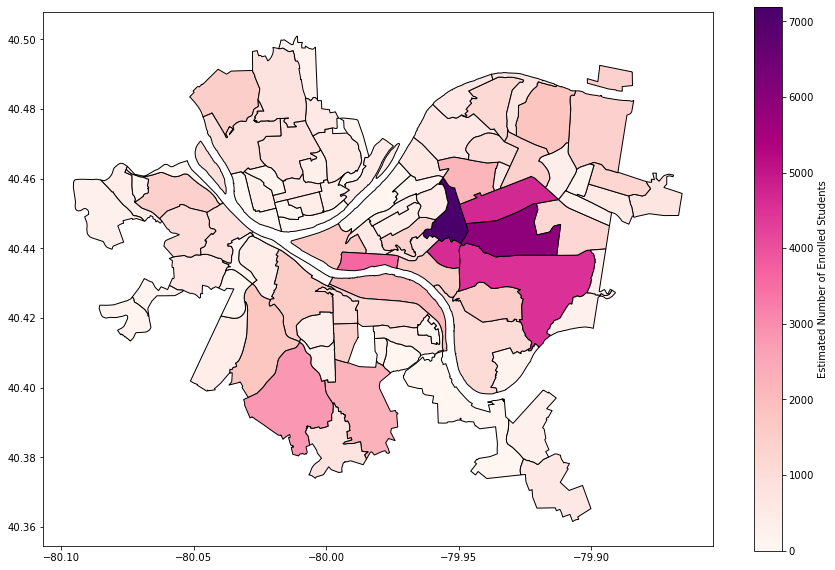

In [5]:
total_enroll = enroll.groupby('Neighborhood').sum()['Estimate; Enrolled in school:']
total_enroll.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

neighborhoods[['hood','area','perimeter','geometry']]
hood_map = neighborhoods.merge(total_enroll, how='left', left_on='hood', right_on='Neighborhood')

hood_map.plot(column='Estimate; Enrolled in school:', # set the data to be used for coloring
               cmap='RdPu',           # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Estimated Number of Enrolled Students"}, # label the legend
               figsize=(15, 10),        
               )

I use geopandas to plot a map of Pittsburgh that colors in each neighborhood, with respect to its total amount of enrolled students. It takes in the shapes and data from the Neighborhoods folder to generate a sorted map visual of the school enrollment ranking. This gives us a brief overview of what the best neighborhoods are.

Text(0.5, 0, 'Total Enrollment')

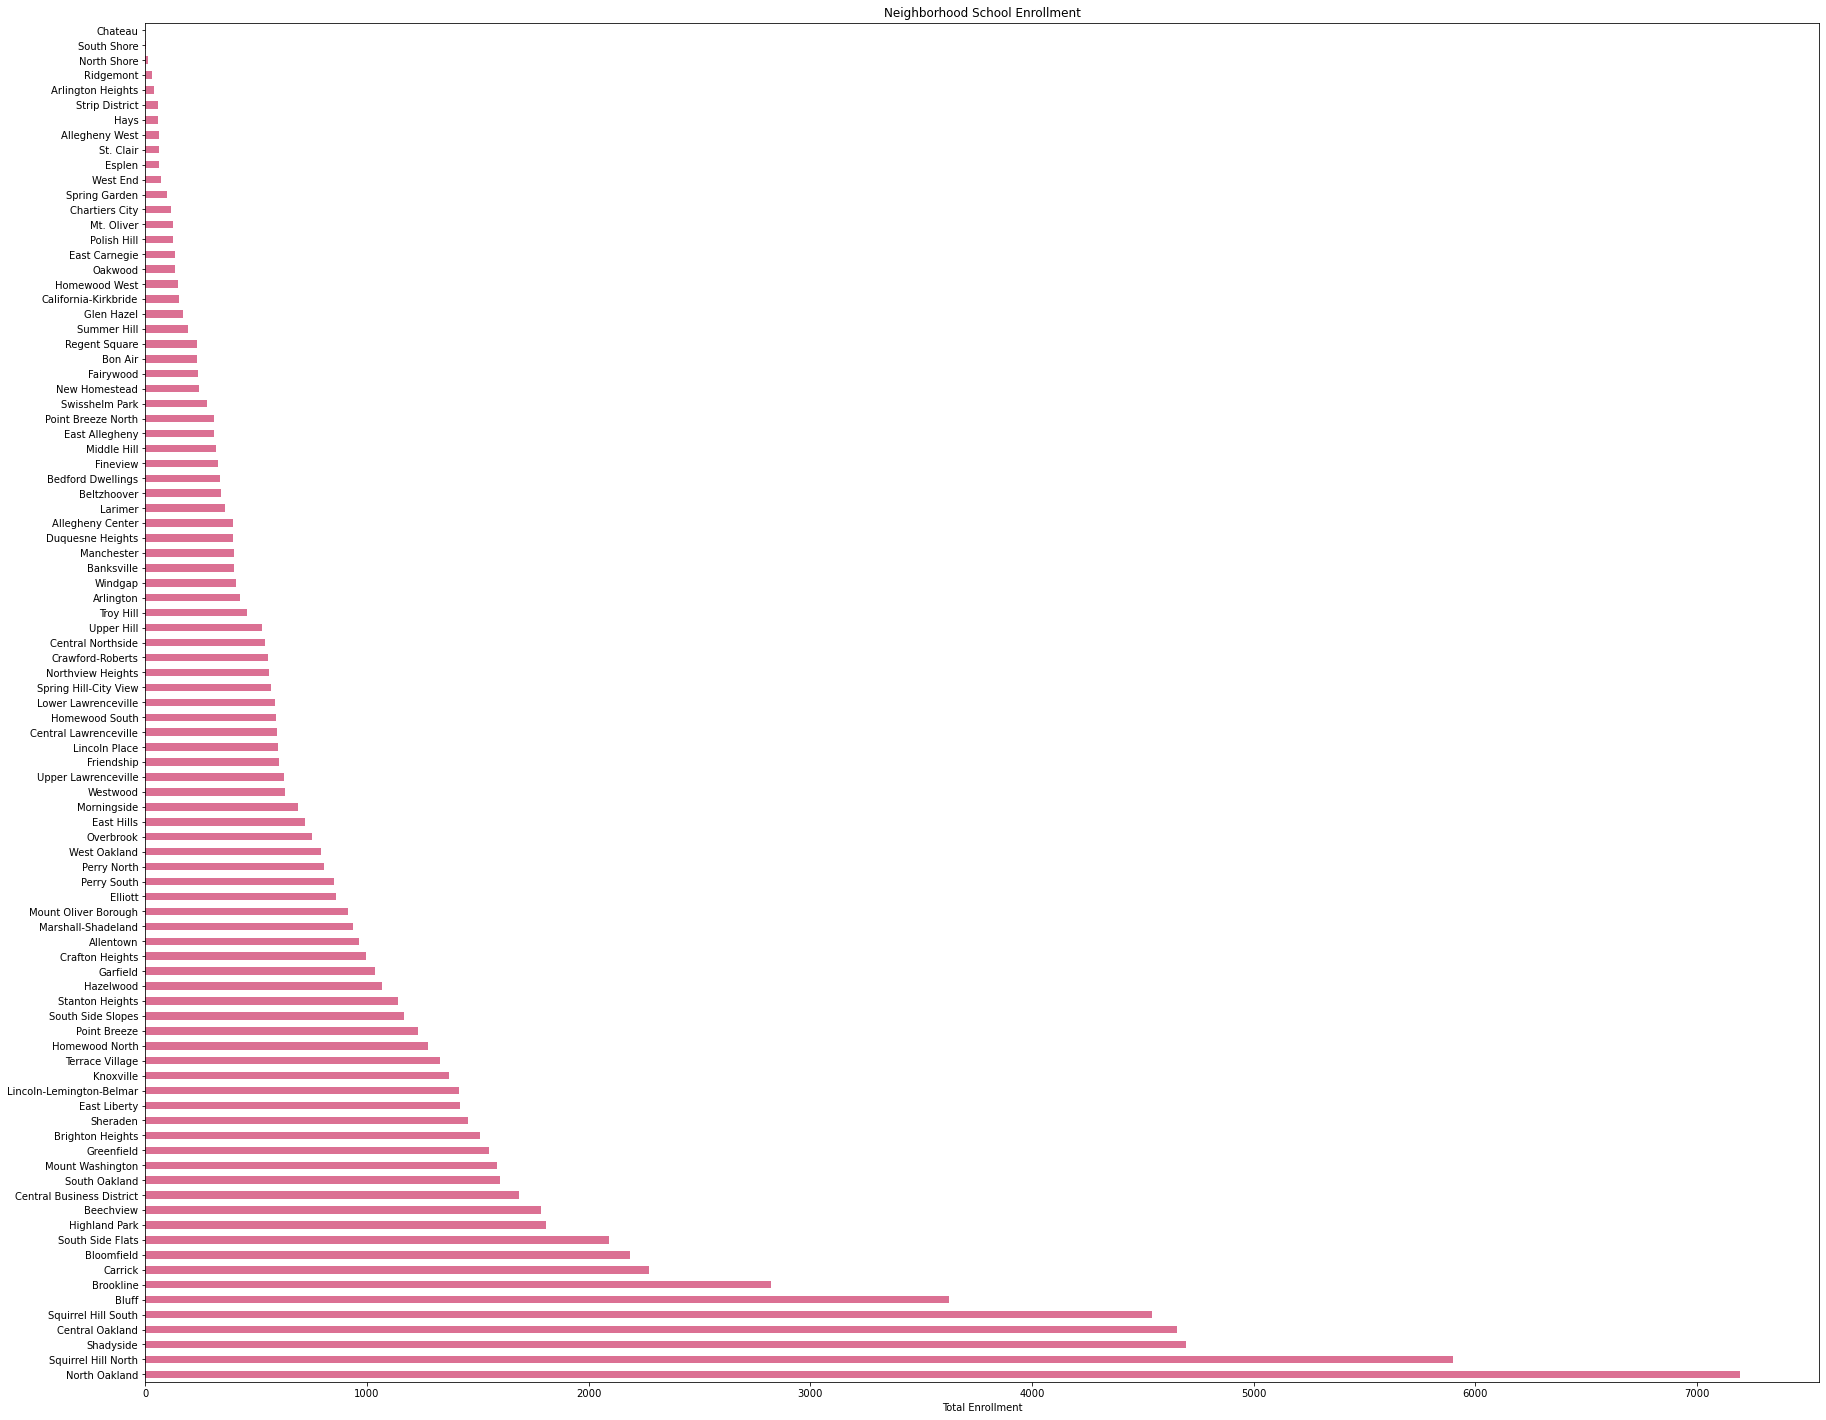

In [4]:
data_graph = pd.Series(enroll_dict).sort_values(ascending=False)

data_graph.plot.barh(color = ["palevioletred"], #https://matplotlib.org/stable/gallery/color/named_colors.html
                     figsize=(30,25))

plt.title("Neighborhood School Enrollment")
plt.xlabel('Total Enrollment')

Converting the dictionary of enrollment data to a series allows us to call the plot() function from pandas. Here is a horizontal bar graph sorted in descending order to visualize the neighborhood with the highest school enrollment.

<AxesSubplot:>

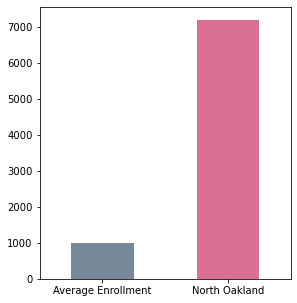

In [5]:
avg_dict = {"Average Enrollment" : data_graph.mean(),
           "North Oakland" : data_graph.max()}

avg_compare = pd.Series(avg_dict)
avg_compare.plot.bar(color = ["lightslategrey","palevioletred"],
                     rot=0,
                    figsize=(4.5,5))

This simple vertical bar graph helps emphasize how best North Oakland is, when compared to the average school enrollment.

<img src="https://i.imgur.com/m5e4ki2.jpg" width="800">
<i> Credit: Aimee Obidzinski </i>


**North Oakland is the clear winner in regards to total school enrollment.** But what does the actual makeup of the total look like?

### Breaking down North Oakland:


<AxesSubplot:xlabel='Neighborhood'>

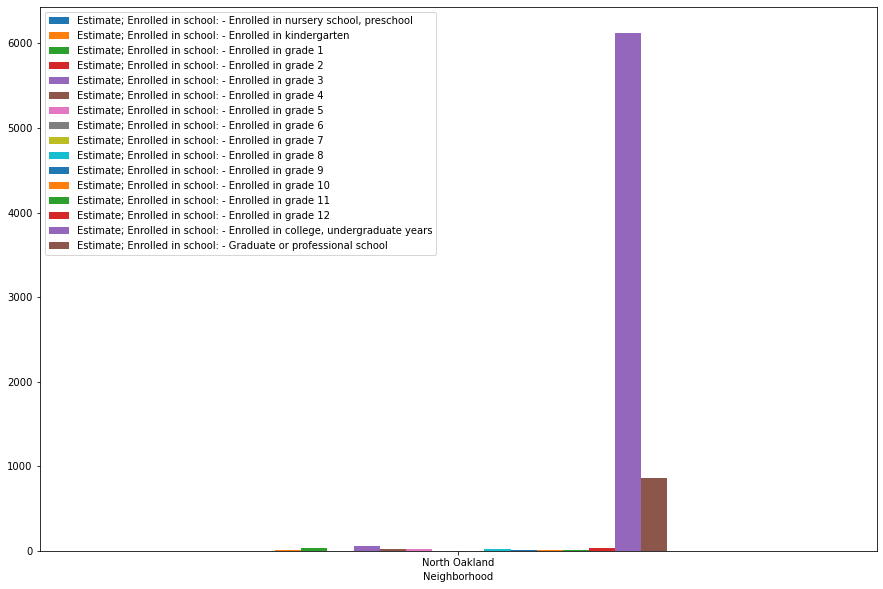

In [7]:
enroll = pd.read_csv("school-enrollment.csv",
                    index_col = 'Neighborhood')
del enroll['Id']
del enroll['Margin of Error; Total:']
del enroll["Margin of Error; Enrolled in school:"]
del enroll['Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool']
del enroll['Margin of Error; Enrolled in school: - Enrolled in kindergarten']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 1']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 2']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 3']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 4']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 5']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 6']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 7']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 8']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 9']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 10']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 11']
del enroll['Margin of Error; Enrolled in school: - Enrolled in grade 12']
del enroll['Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years']
del enroll['Margin of Error; Enrolled in school: - Graduate or professional school']
del enroll['Margin of Error; Not enrolled in school']

del enroll['Estimate; Enrolled in school:']
del enroll['Estimate; Total:']
del enroll['Estimate; Not enrolled in school']

NorthOak = enroll['North Oakland': 'North Oakland'][:]
NorthOak.plot.bar(rot=0, 
                  figsize = (15,10))

Here, I reread the csv file to a new variable that will only hold data pertaining to North Oakland, and nothing else. I also delete the undesirable columns that make it hard to work with the data. When attempting to compare the data, there is an overwhelming dominance in the data by undergraduates and graduate students.

<img src="https://i.imgur.com/6TllGy2.png" width="700">

<i> Credit: Google Maps </i>

The dominance by college students in the data is most likely explained by the fact that North Oakland is the centerpiece of Pittsburgh. Not only is Pitt within North Oakland, the neighborhood is also surrounded by multiple colleges with multiple campus living spaces.

<img src="https://i.imgur.com/8iPlxk6.png" width="700">

<i> Credit: Google Maps </i>

In [10]:
del NorthOak['Estimate; Enrolled in school: - Enrolled in college, undergraduate years']
del NorthOak['Estimate; Enrolled in school: - Graduate or professional school']

To be able to properly compare the data, I remove the ungrad and graduate columns being considered in the data. This allows me to zoom into the rest of the data that was overshadowed.

<AxesSubplot:>

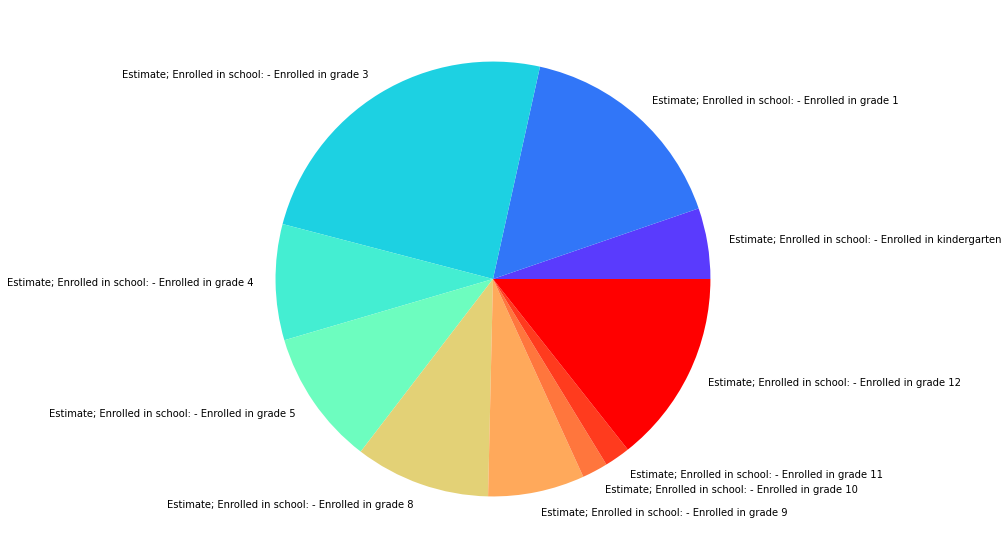

In [11]:
NorthOak.squeeze().plot.pie(figsize = (10,10), 
                            colormap = 'rainbow', #https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
                            ylabel = '')

This pie chart provides a visual explanation that if you were to live in North Oakland and not attending college, the best grade level within North Oakland is Third Grade.

In [12]:
NorthOak #show pie chart just ignores columns with 0.0 value

,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12
Neighborhood,,,,,,,,,,,,,,
North Oakland,0.0,11.0,34.0,0.0,51.0,18.0,21.0,0.0,0.0,21.0,15.0,4.0,4.0,30.0


Surprisingly, North Oakland has 0 people enrolled in a school at multiple grade levels (as of this 2015 data).

## Enrollment Conclusion

North Oakland is the best neighborhood by the metric comparing total school enrollment and if you were to live in North Oakland, the best grade to make friends in, is as an Undergraduate in college! **😁**

...or as a third grader.

# Time for facillities placements!!
 We're going to be looking at the locations and designations of public facillities in pittsburgh to judge hown much engagement is provided by the city and maintained by different organizations.
 
 First step is to import some libraries we're gonna need to be able to handle the csv we're passing in, and then as soon as they're passed in we'll scan the csv itself.


In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

facillities = pd.read_csv("facilitiesPGH.csv")
##facillitiesDIR = pd.read_csv("facilitiesPGHDIR.csv")


Since those lines only initialize some variables that we'll be using later thre's no output, but I'll print the top 10 rows below.

In [2]:
print(facillities.head(10))

           id  parcel_id inactive  \
0   650726265  120-J-300        f   
1   783044037    2-H-284        f   
2  1997158435   23-R-157        f   
3   204824684   10-F-198        f   
4   472140955  013-K-314        f   
5   984285720   13-F-217        f   
6  2110346447   13-K-314        f   
7   263802473    3-M-404        f   
8   271629667    49-K-61        f   
9   436558867        NaN        f   

                                                name rentable       type  \
0                          57th Street Park Building        f    Storage   
1                    Albert Turk Graham Park Shelter        f    Shelter   
2  Allegheny Northside Senior Center and Hazlett ...        t     Senior   
3                            Ammon Recreation Center        f       Pool   
4                    Arlington Field Lights Building        f    Utility   
5                                      Arlington Gym        t   Activity   
6                           Arlington Pool Restrooms        

Well that looks pretty nasty, and there's not to much helping us understand the data. Firstly seeing longitude and latitude means that we can do location pretty easily, but we have a neighborhood grouping already built in to the sheet! Wonderful!

In [3]:
facil_dict = dict()
for row in range(len(facillities)):
    if facillities.iloc[row,11] in facil_dict:
        facil_dict[facillities.iloc[row,11]] = facil_dict[facillities.iloc[row,11]]+1
    else:
        facil_dict[facillities.iloc[row,11]] = 1
    
print(facil_dict)

{'Upper Lawrenceville': 1, 'Crawford-Roberts': 3, 'Allegheny Center': 4, 'Bedford Dwellings': 6, 'South Side Slopes': 11, 'South Side Flats': 5, 'Lower Lawrenceville': 7, 'Highland Park': 30, 'Banksville': 7, 'Beechview': 6, 'Bloomfield': 6, 'Bon Air': 1, 'Brighton Heights': 14, 'Brookline': 19, 'Hazelwood': 14, 'Lincoln-Lemington-Belmar': 11, 'Windgap': 3, 'Central Business District': 8, 'Troy Hill': 3, 'Crafton Heights': 1, 'East Hills': 3, 'East Liberty': 3, 'Fairywood': 1, 'Strip District': 15, 'Bluff': 3, 'Fineview': 1, 'Stanton Heights': 1, 'West Oakland': 1, 'Greenfield': 4, 'Central Oakland': 1, 'Homewood South': 3, 'Swisshelm Park': 1, 'Hays': 2, 'Carrick': 12, 'Mount Washington': 7, 'Westwood': 4, 'Elliott': 11, 'Sheraden': 7, 'East Allegheny': 1, 'Perry North': 20, 'Marshall-Shadeland': 3, 'Manchester': 3, 'Spring Hill-City View': 6, 'Squirrel Hill South': 29, 'Garfield': 4, 'Perry South': 2, 'South Oakland': 2, 'Regent Square': 4, 'Point Breeze': 8, 'Glen Hazel': 1, 'Allent

In [2]:
That should give us an idea of the amount of facilities in each individual neighborhood, but agian, we still have plenty of other info on each center available, so lets try using that!

SyntaxError: invalid syntax (<ipython-input-2-459836d75b09>, line 1)

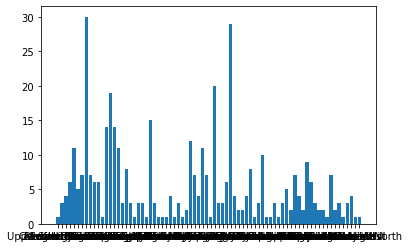

In [6]:
names = list(facil_dict.keys())
values = list(facil_dict.values())
plt.bar(range(len(facil_dict)), values, tick_label=names)
plt.show()

This doesn't look to pretty but you can see that there's no community that has too many facilities aside from those few :(

In [1]:
tpye_dict = dict()
for row in range(len(facillities)):
    if facillities.iloc[row,5] in tpye_dict:
        type_dict[facillities.iloc[row,5]] = tpye_dict[facillities.iloc[row,11]]+1
    else:
        tpye_dict[facillities.iloc[row,5]] = 1
    
print(tpye_dict)

NameError: name 'facillities' is not defined

# Combining all of the data

In this notebook we'll be combining all of the data by first converting all of the number values to numbers between 0 and 1 and then simply adding them together and finding the best value. First we need to import everyone's data.

In [3]:
import numpy

enrollment = {'Allegheny Center': 394.0, 'Allegheny West': 61.0, 'Allentown': 965.0, 'Arlington': 427.0, 'Arlington Heights': 40.0, 'Banksville': 402.0, 'Bedford Dwellings': 337.0, 'Beechview': 1783.0, 'Beltzhoover': 342.0, 'Bloomfield': 2185.0, 'Bluff': 3625.0, 'Bon Air': 235.0, 'Brighton Heights': 1511.0, 'Brookline': 2824.0, 'California-Kirkbride': 152.0, 'Carrick': 2274.0, 'Central Business District': 1685.0, 'Central Lawrenceville': 594.0, 'Central Northside': 542.0, 'Central Oakland': 4656.0, 'Chartiers City': 118.0, 'Chateau': 0.0, 'Crafton Heights': 996.0, 'Crawford-Roberts': 555.0, 'Duquesne Heights': 395.0, 'East Allegheny': 312.0, 'East Carnegie': 133.0, 'East Hills': 719.0, 'East Liberty': 1420.0, 'Elliott': 860.0, 'Esplen': 63.0, 'Fairywood': 237.0, 'Fineview': 328.0, 'Friendship': 604.0, 'Garfield': 1037.0, 'Glen Hazel': 168.0, 'Greenfield': 1552.0, 'Hays': 58.0, 'Hazelwood': 1067.0, 'Highland Park': 1806.0, 'Homewood North': 1276.0, 'Homewood South': 588.0, 'Homewood West': 148.0, 'Knoxville': 1372.0, 'Larimer': 361.0,'Lincoln Place': 599.0, 'Lincoln-Lemington-Belmar': 1417.0, 'Lower Lawrenceville': 587.0, 'Manchester': 399.0, 'Marshall-Shadeland': 936.0, 'Middle Hill': 318.0, 'Morningside': 687.0, 'Mount Oliver Borough': 913.0, 'Mount Washington': 1587.0, 'Mt. Oliver': 124.0, 'New Homestead': 243.0, 'North Oakland': 7192.0, 'North Shore': 12.0, 'Northview Heights': 560.0, 'Oakwood': 135.0, 'Overbrook': 750.0, 'Perry North': 805.0, 'Perry South': 849.0, 'Point Breeze': 1232.0, 'Point Breeze North': 308.0, 'Polish Hill': 126.0, 'Regent Square': 232.0, 'Ridgemont': 31.0, 'Shadyside': 4694.0, 'Sheraden': 1454.0, 'South Oakland': 1598.0, 'South Shore': 4.0, 'South Side Flats': 2091.0, 'South Side Slopes': 1166.0, 'Spring Garden': 96.0, 'Spring Hill-City View': 569.0, 'Squirrel Hill North': 5901.0, 'Squirrel Hill South': 4541.0, 'St. Clair': 61.0, 'Stanton Heights': 1139.0, 'Strip District': 55.0, 'Summer Hill': 194.0, 'Swisshelm Park': 279.0, 'Terrace Village': 1328.0, 'Troy Hill': 458.0, 'Upper Hill': 527.0, 'Upper Lawrenceville': 625.0, 'West End': 71.0, 'West Oakland': 791.0, 'Westwood': 629.0, 'Windgap': 410.0}

bustops = {'Point Breeze South': 1, 'Churchill Valley': 1, 'Lincoln-Lemington': 1, 'Verona Hills': 1, 'Glassmere': 1, 'Pleasantville': 1, 'Creighton': 1, 'New Homestead': 1.2594458438287153, 'Laketon Heights': 2, 'Newfield': 2, 'Rosedale': 2, 'Shannon Heights': 2, 'Oakmont Commons': 2, 'Mexican War Streets Historic District': 2, 'Oakcliffe': 3, 'Upper Hill': 3.194888178913738, 'Sunset Hills': 4, 'Hays': 5.142857142857143, 'Holiday Park': 6, 'St. Clair': 6.451612903225807, 'Crestas Terrace': 7, 'Sandy Creek': 7, 'Blackridge': 8, 'Eastvue': 9, 'Rosedale Heights': 9, 'West Wilmerding': 10, 'Grace Manor': 10, 'Central Lawrenceville': 10.384215991692628, 'Swisshelm Park': 10.416666666666668, 'Evergreen': 11, 'River Valley': 11, 'Bellefield': 12, 'Oakland': 12, 'Lawrenceville': 12, 'Sheraden': 12.359550561797752, 'Nadine': 13, 'Regency Park': 13, 'Universal': 14, 'Alcoma Estates': 14, 'Mount Oliver': 14, 'Park Place': 15, 'Woods Run': 15, 'Banksville': 15.479876160990711, 'Hazelwood': 15.792798483891344, 'Lincoln Park': 16, 'Crescent Hills': 16, 'Unity': 16, 'Spring Hill': 16, 'Fairywood': 16.511867905056757, 'Penn Ridge': 17, 'Perry South': 17.679558011049725, 'Homewood': 18, 'City View': 18, 'Natrona Heights': 18, 'Hill District': 19, 'Hites': 19, 'McKees Rocks Bottoms': 19, 'Overbrook': 19.07032181168057, 'Beechview': 19.863013698630137, 'North Bessemer': 20, 'Cedarhurst Manor': 20, 'Point Breeze North': 20.979020979020977, 'Billy Buck Hill': 21, 'West Liberty': 21, 'Bluff': 21.406727828746178, 'Schenley Heights': 22, 'Brookline': 23.05475504322767, 'North Shore': 23.102310231023104, 'Mission Hills': 24, 'Duquesne Heights': 24.077046548956663, 'Squirrel Hill North': 25.368248772504092, 'Point Breeze': 25.89641434262948, 'Westwood': 26.011560693641616, 'Four Mile Run': 27, 'Frankstown Estates': 27, 'Lincoln Place': 27.4390243902439, 'Homewood South': 27.638190954773872, 'Arlington': 29.787234042553195, 'East Carnegie': 30.092592592592588, 'Homestead Park': 32, 'Squirrel Hill South': 32.197678771995506, 'Highland Park': 32.67411865864144, 'Elliott': 33.00330033003301, 'Perry North': 34, 'Soho': 35, 'Corliss': 35, 'Perry Hilltop': 36, 'Glen Hazel': 37.280701754385966, 'Brushton': 38, 'Glenwood': 39, 'Esplen': 39.130434782608695, 'South Oakland': 39.37007874015748, 'Stanton Heights': 39.45578231292517, 'Squirrel Hill': 40, 'Bon Air': 41.533546325878596, 'South Side Slopes': 41.899441340782126, 'Middle Hill': 42.622950819672134, 'Terrace Village': 43.859649122807014, 'Eastwood': 44, 'Chartiers City': 45.45454545454545, 'Windgap': 45.78313253012048, 'West End': 50.0, 'Chateau': 52.219321148825074, 'Homewood North': 55.29953917050691, 'Crafton Heights': 55.702917771883286, 'Fineview': 56.0, 'Brighton Heights': 59.08683974932856, 'Carrick': 59.772863120143455, 'Strip District': 62.5, 'Belmar': 63, 'South Side Flats': 63.03418803418804, 'Oakwood': 63.492063492063494, 'Greenfield': 65.97671410090557, 'Bedford Dwellings': 67.0391061452514, 'Northview Heights': 70.28753993610223, 'South Shore': 70.75471698113208, 'Summer Hill': 72.89293849658314, 'East Hills': 77.63401109057301, 'Allentown': 77.96610169491525, 'Allegheny West': 78.01418439716313, 'Upper Lawrenceville': 79.01234567901234, 'Lower Lawrenceville': 79.06976744186046, 'Mount Washington': 85.16242317822652, 'Manchester': 86.0215053763441, 'Garfield': 87.527352297593, 'Shadyside': 89.03365906623236, 'Allegheny Center': 90.47619047619048, 'Central Northside': 92.66409266409266, 'North Oakland': 94.18837675350701, 'Hamnett Place': 95, 'Morningside': 96.8586387434555, 'Downtown': 97, 'Beltzhoover': 97.38717339667457, 'Crawford-Roberts': 104.65116279069767, 'Bloomfield': 116.8091168091168, 'East Liberty': 117.039586919105, 'Lincoln-Lemington-Belmar': 117.85714285714285, 'Troy Hill': 119.79166666666666, 'Spring Garden': 123.63636363636363, 'Homewood West': 125.6281407035176, 'East Allegheny': 131.3559322033898, 'West Oakland': 134.88372093023256, 'Knoxville': 135.76158940397352, 'Polish Hill': 137.2549019607843, 'Regent Square': 140.625, 'Larimer': 141.57303370786516, 'California-Kirkbride': 142.85714285714286, 'Marshall-Shadeland': 194.8051948051948, 'Friendship': 216.9811320754717}

facilities = {'Upper Lawrenceville': 1, 'Crawford-Roberts': 3, 'Allegheny Center': 4, 'Bedford Dwellings': 6, 'South Side Slopes': 11, 'South Side Flats': 5, 'Lower Lawrenceville': 7, 'Highland Park': 30, 'Banksville': 7, 'Beechview': 6, 'Bloomfield': 6, 'Bon Air': 1, 'Brighton Heights': 14, 'Brookline': 19, 'Hazelwood': 14, 'Lincoln-Lemington-Belmar': 11, 'Windgap': 3, 'Central Business District': 8, 'Troy Hill': 3, 'Crafton Heights': 1, 'East Hills': 3, 'East Liberty': 3, 'Fairywood': 1, 'Strip District': 15, 'Bluff': 3, 'Fineview': 1, 'Stanton Heights': 1, 'West Oakland': 1, 'Greenfield': 4, 'Central Oakland': 1, 'Homewood South': 3, 'Swisshelm Park': 1, 'Hays': 2, 'Carrick': 12, 'Mount Washington': 7, 'Westwood': 4, 'Elliott': 11, 'Sheraden': 7, 'East Allegheny': 1, 'Perry North': 20, 'Marshall-Shadeland': 3, 'Manchester': 3, 'Spring Hill-City View': 6, 'Squirrel Hill South': 29, 'Garfield': 4, 'Perry South': 2, 'South Oakland': 2, 'Regent Square': 4, 'Point Breeze': 8, 'Glen Hazel': 1, 'Allentown': 3, 'Morningside': 10, 'Homewood North': 1, 'Central Northside': 1, 'Terrace Village': 3, 'Larimer': 1, 'Central Lawrenceville': 3, 'Lincoln Place': 5, 'Upper Hill': 2, 'Beltzhoover': 7, 'Knoxville': 4, 'West End': 2, 'Shadyside': 9, 'Homewood West': 6, 'Oakwood': 3, 'Overbrook': 2, 'Chateau': 2, 'California-Kirkbride': 1, 'Squirrel Hill North': 7, 'Duquesne Heights': 2, 'North Oakland': 3, 'Allegheny West': 3, 'Polish Hill': 4, 'Point Breeze North': 1, 'Middle Hill': 1}



Now that we've imported all of the data. We can combine it together by first transferring each range to a value between 0 and 1, and then going through it one-by-one and adding them all together.

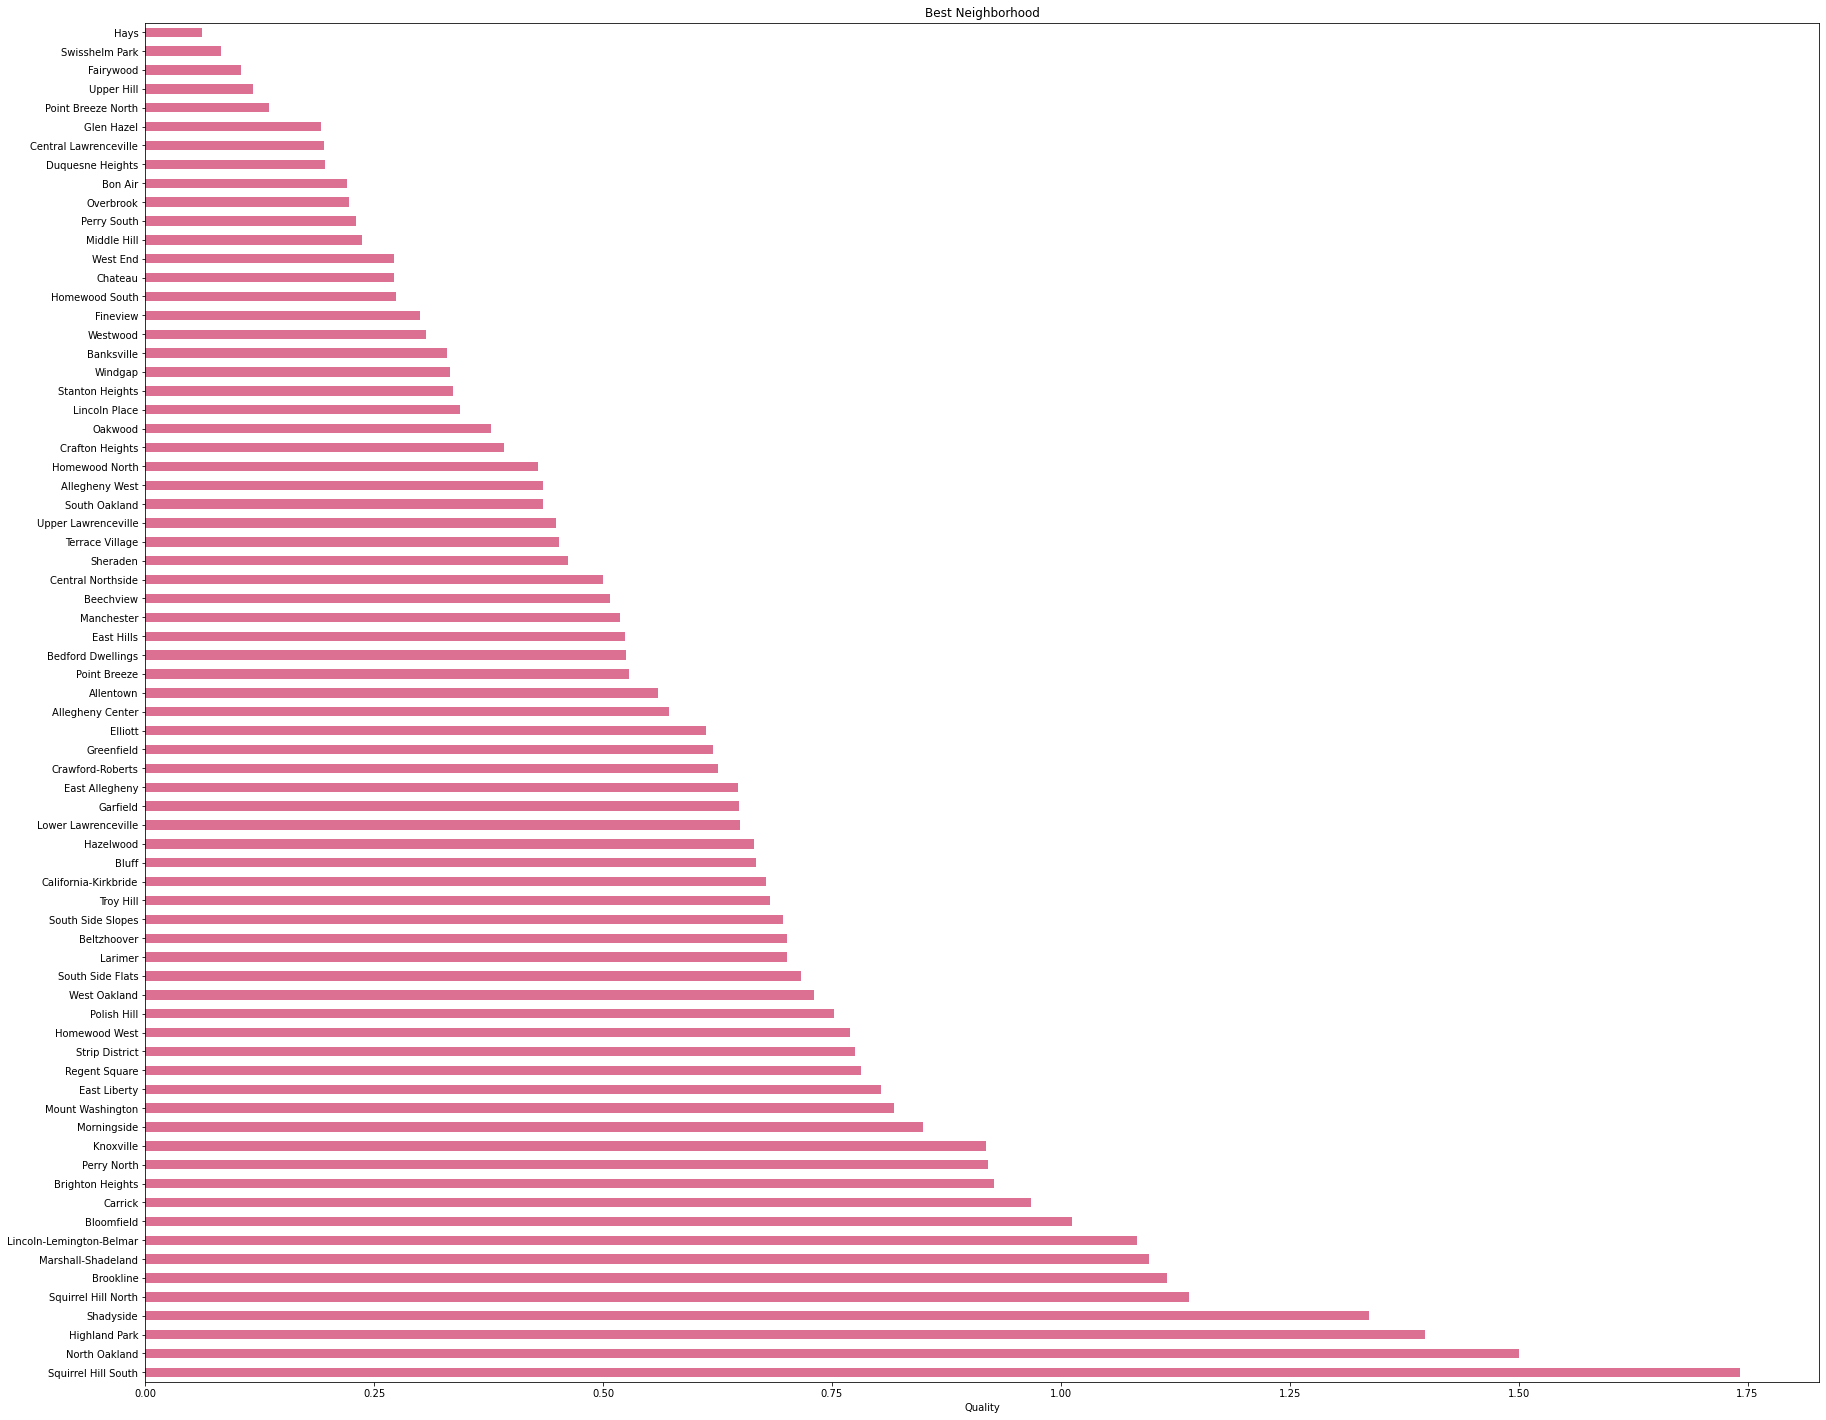

In [5]:
maxi = max(bustops.values())
mini = min(bustops.values())

for hood in bustops:
    bustops[hood] = (bustops[hood] - mini) / (maxi - mini)

maxi = max(enrollment.values())
mini = min(enrollment.values())

for hood in enrollment:
    enrollment[hood] = (enrollment[hood] - mini) / (maxi - mini)
    
    
maxi = max(facilities.values())
mini = min(facilities.values())

for hood in facilities:
    facilities[hood] = (facilities[hood] - mini) / (maxi - mini)

final = {}
    
for hood in bustops:
    if hood in facilities:
        if hood in enrollment:
            final[hood] = bustops[hood] + facilities[hood] + enrollment[hood]
            
import pandas as pd
import matplotlib.pyplot as plt

data_graph = pd.Series(final).sort_values(ascending=False)

data_graph.plot.barh(color = ["palevioletred"], #https://matplotlib.org/stable/gallery/color/named_colors.html
                     figsize=(30,25))

plt.title("Best Neighborhood")
plt.xlabel('Quality')

plt.show()

We have the final list, so we can sort it, and display the top 10 values. The first result is the best neighborhood in Pittsburgh

In [16]:
final = dict(sorted(final.items(), key=lambda item: item[1])) # sort the stops        

for x in list(reversed(list(final)))[0:10]:
    print (x + ": " + str(final[x]) + " score")

Squirrel Hill South: 1.741359552551112 score
North Oakland: 1.5004308765438927 score
Highland Park: 1.3977645955809774 score
Shadyside: 1.3361305426798706 score
Squirrel Hill North: 1.1402173682068437 score
Brookline: 1.1154624318843802 score
Marshall-Shadeland: 1.0964347772612355 score
Lincoln-Lemington-Belmar: 1.0829046106007234 score
Bloomfield: 1.0124237382075119 score
Carrick: 0.9676153530796208 score


# Conclusion
Squirrel Hill South is the best neighborhood in Pittsburgh with a final score of 1.74

### Mae's Conclusion paragraph:
This was a really fun and interesting project. I enjoyed using the things we had learned to apply them in a real-world scenario with real world data. I was surprised that Squirrel Hill South was the best district, I was expecting East Liberty. Nonetheless, the data doesn't lie. 

### Rankins's Conclusion paragraph:

I don't really have a personal opinion on which Pittsburgh neighborhood is the best. But I do like that the school enrollment metric made North Oakland win, H2P! **👍** I definitely was expecting a middle Pittsburgh neighborhood though, and our final conclusion was pretty much that. This was a pretty fun assignment to work on too, and I'm glad I had some very reliable partners. Shoutout to Jamir's attention to detail and Mae's genius python wizardry!

### Jamir's Conclusion paragraph: